In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [111]:
data=pd.read_csv("D:\Mall_Customers.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\MASTER\AppData\Local\Temp\ipykernel_25664\196698524.py:1: SyntaxWarning: invalid escape sequence '\M'
  data=pd.read_csv("D:\Mall_Customers.csv")


In [112]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [113]:
data.head()
def gender_to_number(value):
    if value=='Male':
        return 1
    else: return 0
data['Gender']=data['Gender'].apply(gender_to_number)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [114]:
data.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


Text(16.819444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

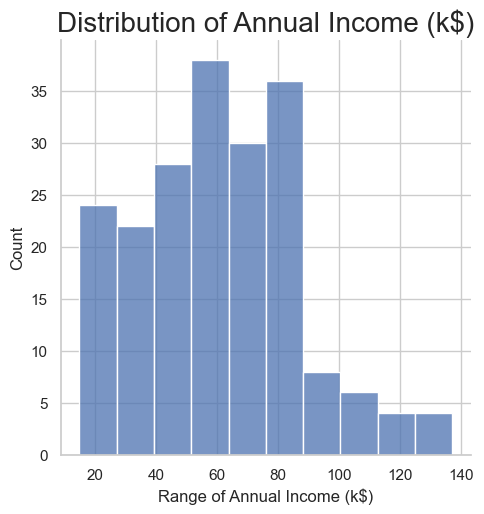

In [132]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(16.819444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

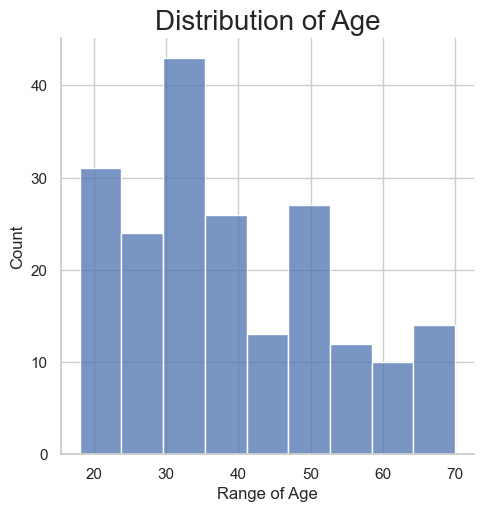

In [133]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(16.819444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

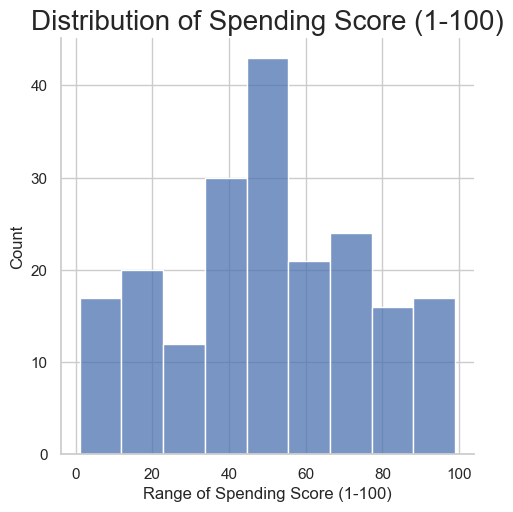

In [134]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

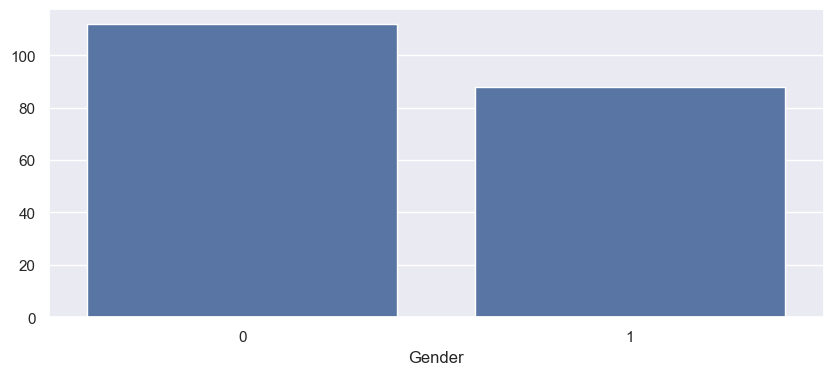

In [135]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [136]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [137]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


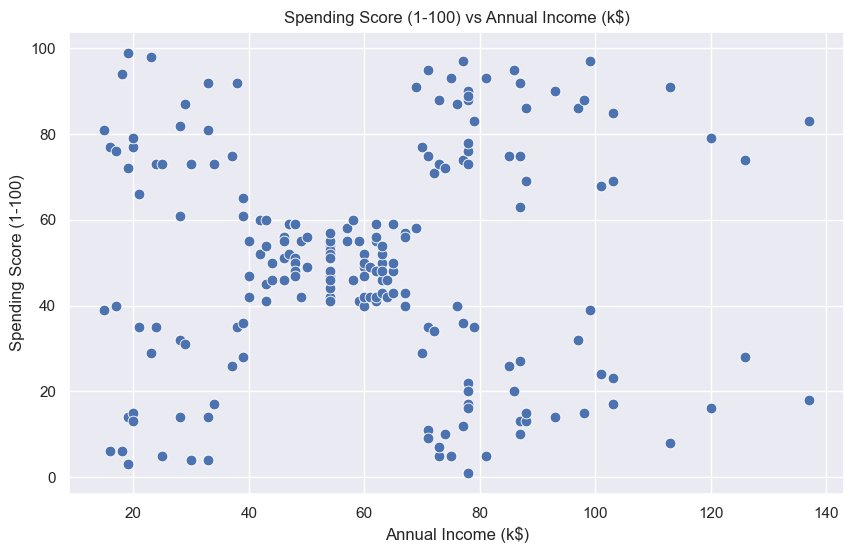

In [138]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [139]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [140]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

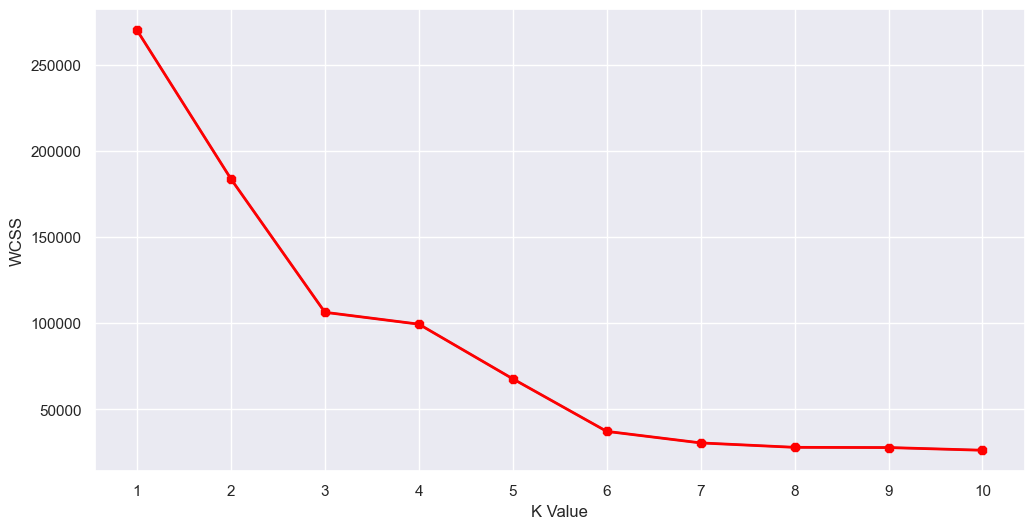

In [141]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [142]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


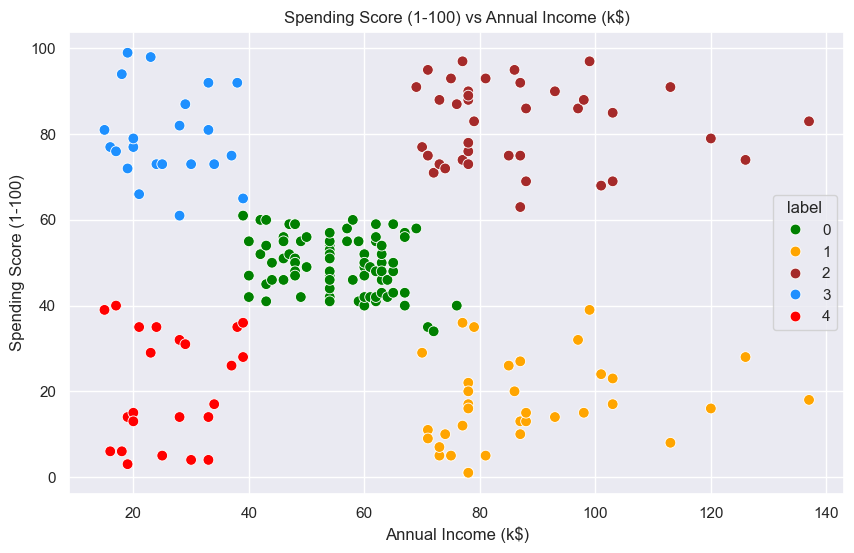

In [143]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

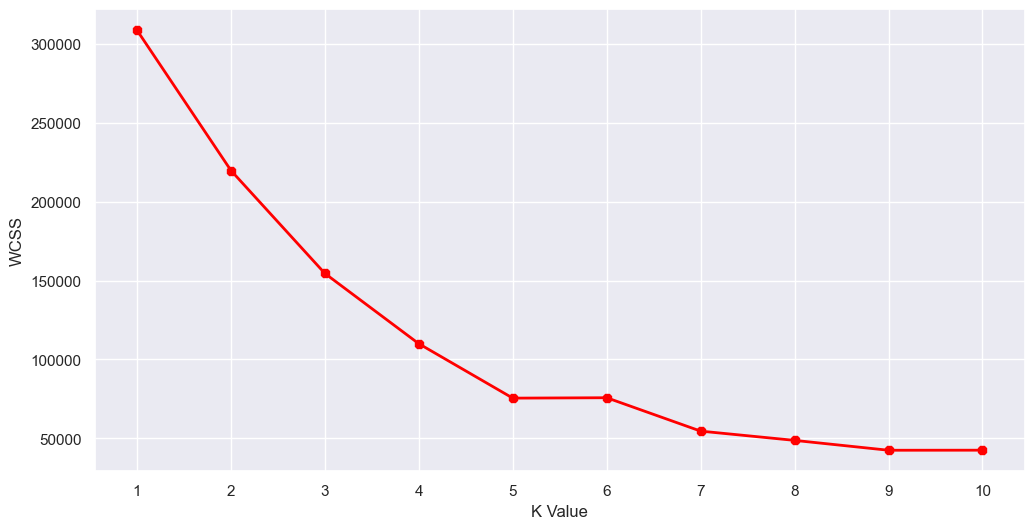

In [144]:
#Taking the features
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [145]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df1["label"] = y2
#The data with labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,7
1,2,1,21,15,81,9
2,3,0,20,16,6,2
3,4,0,23,16,77,9
4,5,0,31,17,40,7


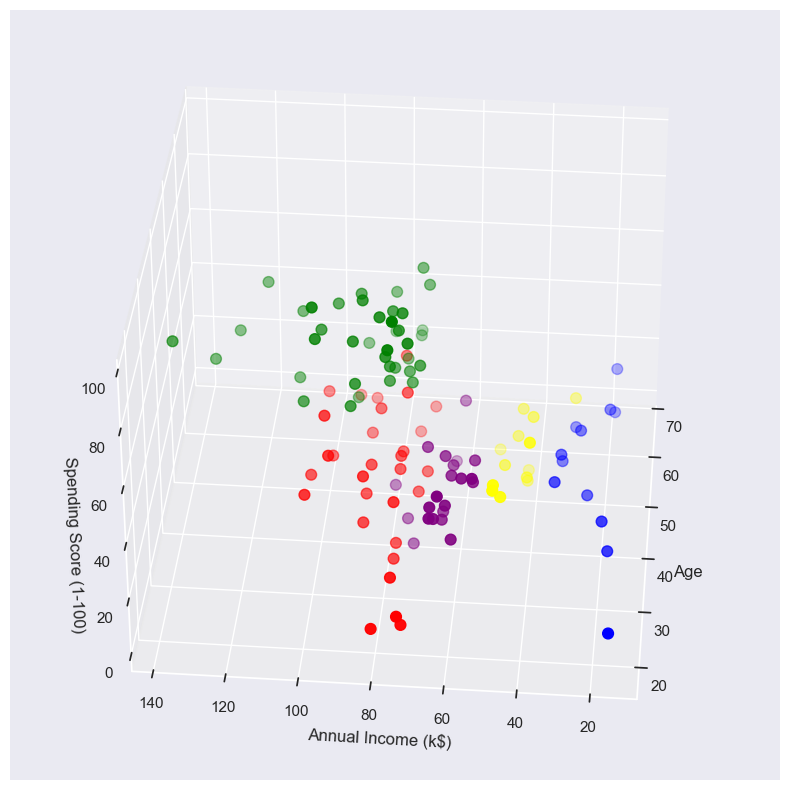

In [146]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [147]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 30
They are - [129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165 167
 169 171 173 175 177 179 181 183 185 187 189 191]
--------------------------------------------
Number of customer in 2nd group= 12
They are - [ 3  7  9 11 13 15 23 25 31 33 35 37]
--------------------------------------------
Number of customer in 3rd group= 21
They are - [ 76  79  85  88  89  92  95  96  98 100 101 104 106 112 114 115 116 121
 125 133 143]
--------------------------------------------
Number of customer in 4th group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 5th group= 13
They are - [28 44 46 48 49 50 52 53 59 62 66 69 70]
--------------------------------------------
